In [19]:
import pandas as pd
import numpy as np


In [20]:
df=pd.read_csv('CDR_source_data.csv')

In [21]:
df.head()

,Country,srcYear,Region or state or Union Territory (UT),Deposit of SCBs excluding inter bank deposits as at end march,Bank credit of SCBs as at end march,Additional information,YearCode,Year
0,India,2017,Assam,120976.0,48754.0,NaN,2017,"Calendar Year (Jan - Dec), 2017"
1,India,2017,Chhattisgarh,118872.0,74179.0,NaN,2017,"Calendar Year (Jan - Dec), 2017"
2,India,2017,Southern Region,2535615.0,2134782.0,NaN,2017,"Calendar Year (Jan - Dec), 2017"
3,India,2017,Manipur,7774.0,3005.0,NaN,2017,"Calendar Year (Jan - Dec), 2017"
4,India,2017,Tripura,20481.0,7354.0,NaN,2017,"Calendar Year (Jan - Dec), 2017"


In [22]:


df = df.drop('Year', axis=1)
df.head()


,Country,srcYear,Region or state or Union Territory (UT),Deposit of SCBs excluding inter bank deposits as at end march,Bank credit of SCBs as at end march,Additional information,YearCode
0,India,2017,Assam,120976.0,48754.0,NaN,2017
1,India,2017,Chhattisgarh,118872.0,74179.0,NaN,2017
2,India,2017,Southern Region,2535615.0,2134782.0,NaN,2017
3,India,2017,Manipur,7774.0,3005.0,NaN,2017
4,India,2017,Tripura,20481.0,7354.0,NaN,2017


In [23]:


df = df.drop('Country', axis=1)
df.head()


,srcYear,Region or state or Union Territory (UT),Deposit of SCBs excluding inter bank deposits as at end march,Bank credit of SCBs as at end march,Additional information,YearCode
0,2017,Assam,120976.0,48754.0,NaN,2017
1,2017,Chhattisgarh,118872.0,74179.0,NaN,2017
2,2017,Southern Region,2535615.0,2134782.0,NaN,2017
3,2017,Manipur,7774.0,3005.0,NaN,2017
4,2017,Tripura,20481.0,7354.0,NaN,2017


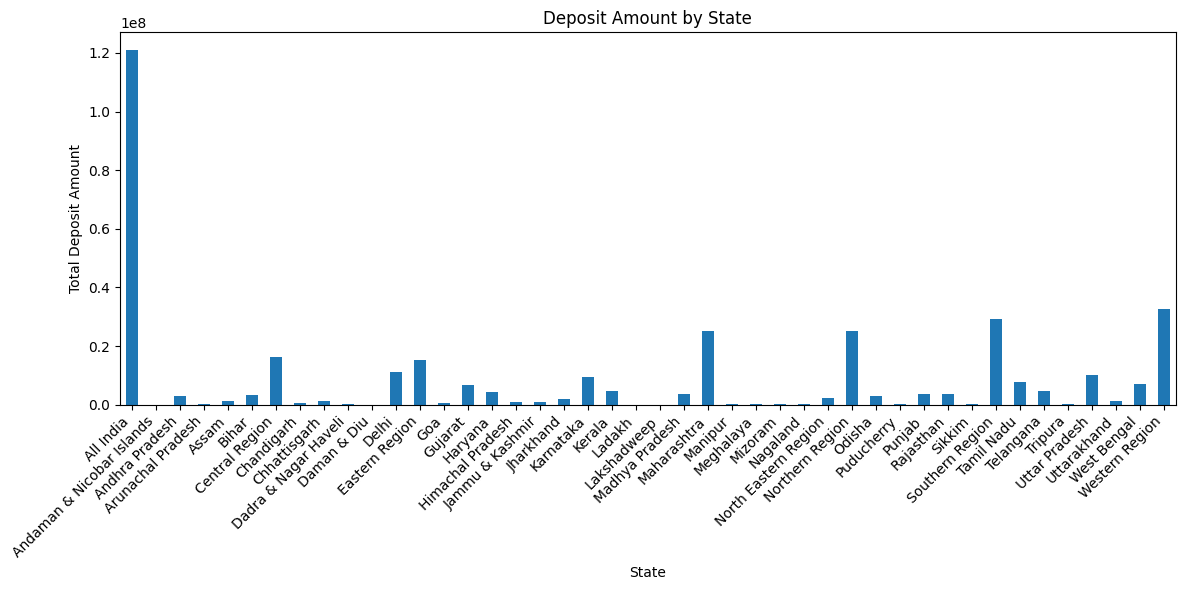

In [24]:
#depoit state wise on graph

import matplotlib.pyplot as plt

state_wise_deposit = df.groupby('Region or state or Union Territory (UT)')['Deposit of SCBs excluding inter bank deposits as at end march'].sum()

plt.figure(figsize=(12, 6))
state_wise_deposit.plot(kind='bar')
plt.title('Deposit Amount by State')
plt.xlabel('State')
plt.ylabel('Total Deposit Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


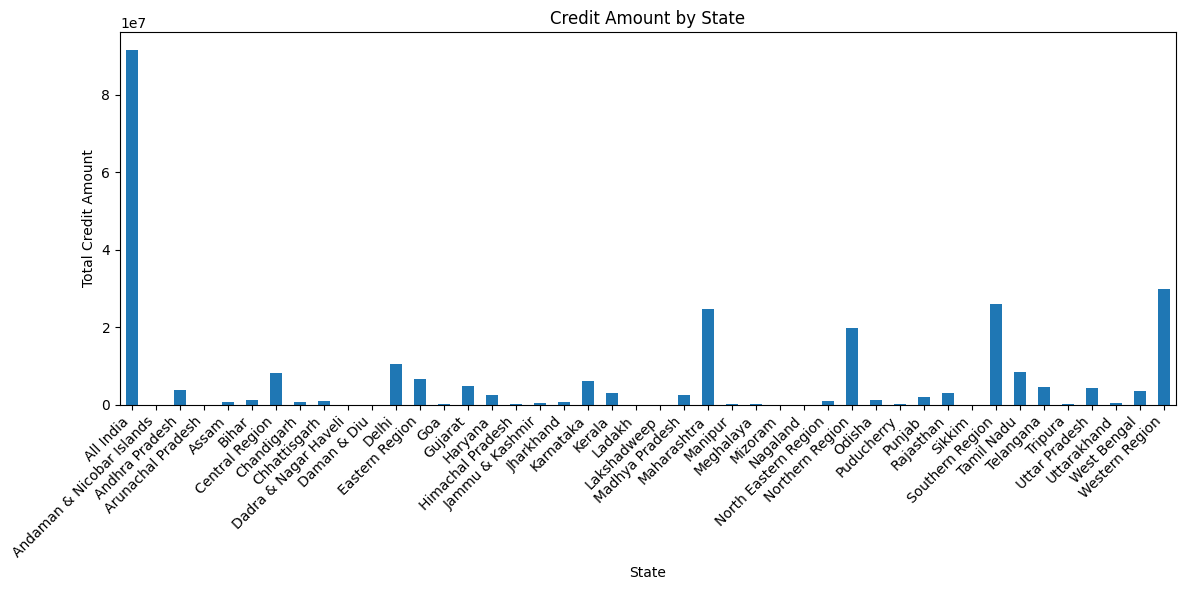

In [25]:
# credit state wise
state_wise_credit = df.groupby('Region or state or Union Territory (UT)')['Bank credit of SCBs as at end march'].sum()

plt.figure(figsize=(12, 6))
state_wise_credit.plot(kind='bar')
plt.title('Credit Amount by State')
plt.xlabel('State')
plt.ylabel('Total Credit Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


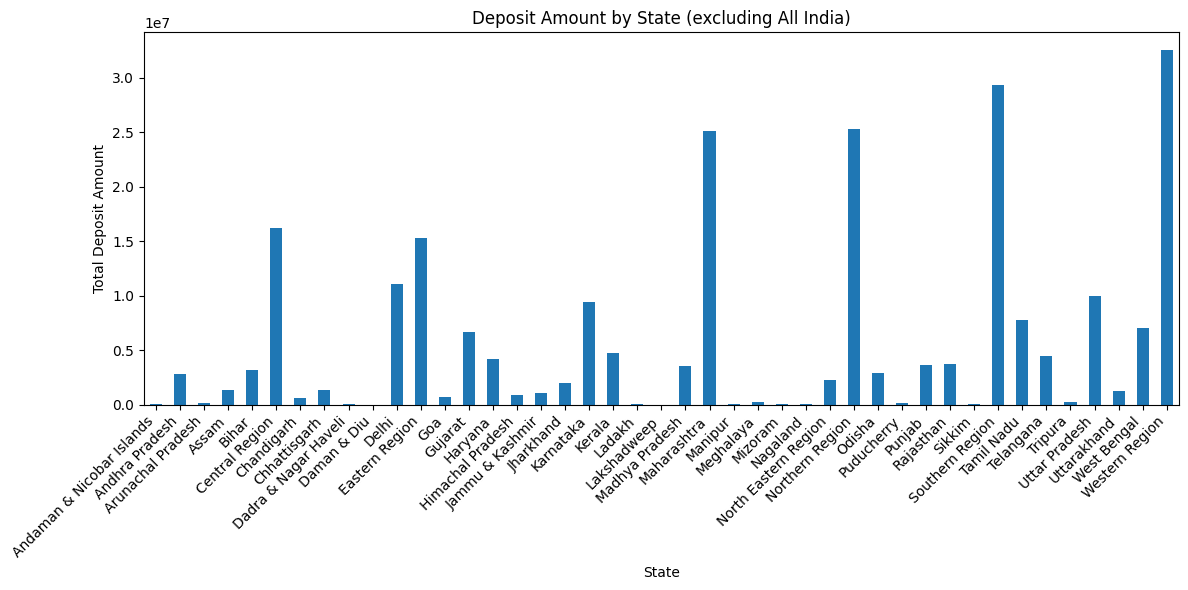

Highest Deposit: Western Region - 32546783.0


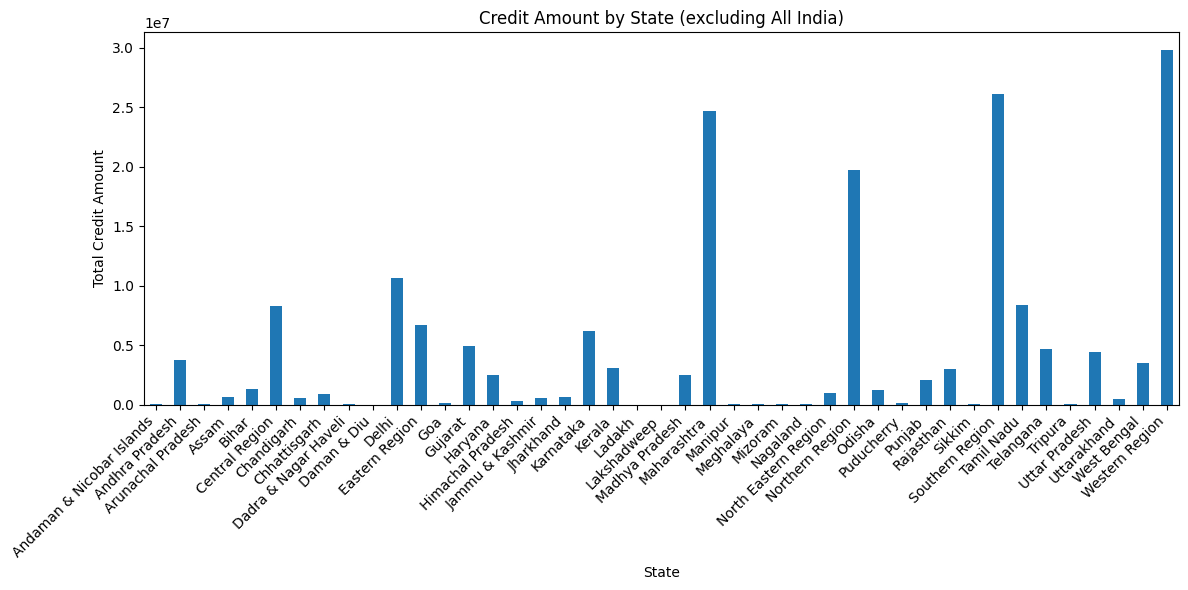

Highest Credit: Western Region - 29784964.0


In [26]:
# highest credit and highest deposit state do not consider all india row

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('CDR_source_data.csv')

df = df.drop('Year', axis=1)
df = df.drop('Country', axis=1)

# Filter out the "All India" row
df_filtered = df[df['Region or state or Union Territory (UT)'] != 'All India']

#depoit state wise on graph
state_wise_deposit = df_filtered.groupby('Region or state or Union Territory (UT)')['Deposit of SCBs excluding inter bank deposits as at end march'].sum()
plt.figure(figsize=(12, 6))
state_wise_deposit.plot(kind='bar')
plt.title('Deposit Amount by State (excluding All India)')
plt.xlabel('State')
plt.ylabel('Total Deposit Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# state with the highest deposit
highest_deposit_state = state_wise_deposit.idxmax()
highest_deposit_amount = state_wise_deposit.max()
print(f"Highest Deposit: {highest_deposit_state} - {highest_deposit_amount}")


# credit state wise
state_wise_credit = df_filtered.groupby('Region or state or Union Territory (UT)')['Bank credit of SCBs as at end march'].sum()
plt.figure(figsize=(12, 6))
state_wise_credit.plot(kind='bar')
plt.title('Credit Amount by State (excluding All India)')
plt.xlabel('State')
plt.ylabel('Total Credit Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# the state with the highest credit
highest_credit_state = state_wise_credit.idxmax()
highest_credit_amount = state_wise_credit.max()
print(f"Highest Credit: {highest_credit_state} - {highest_credit_amount}")


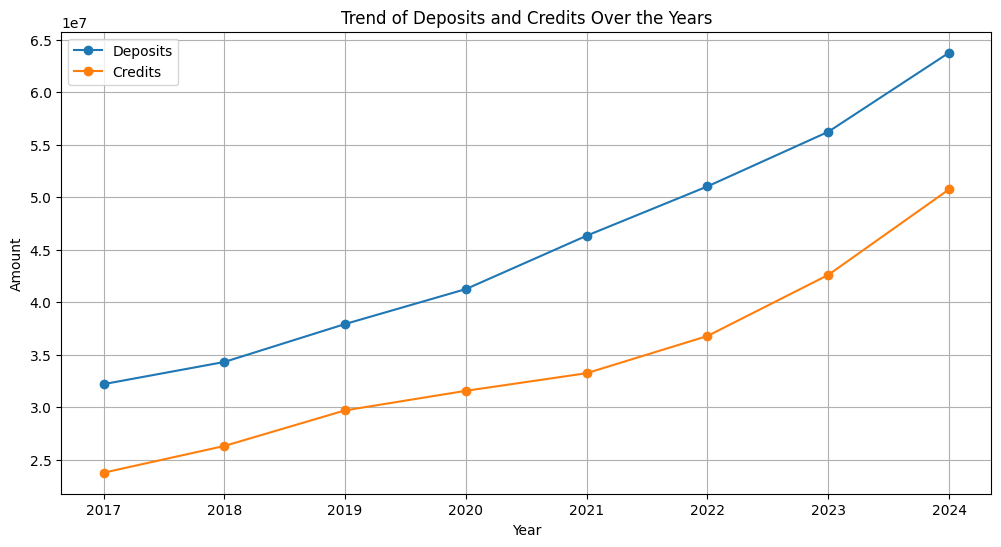

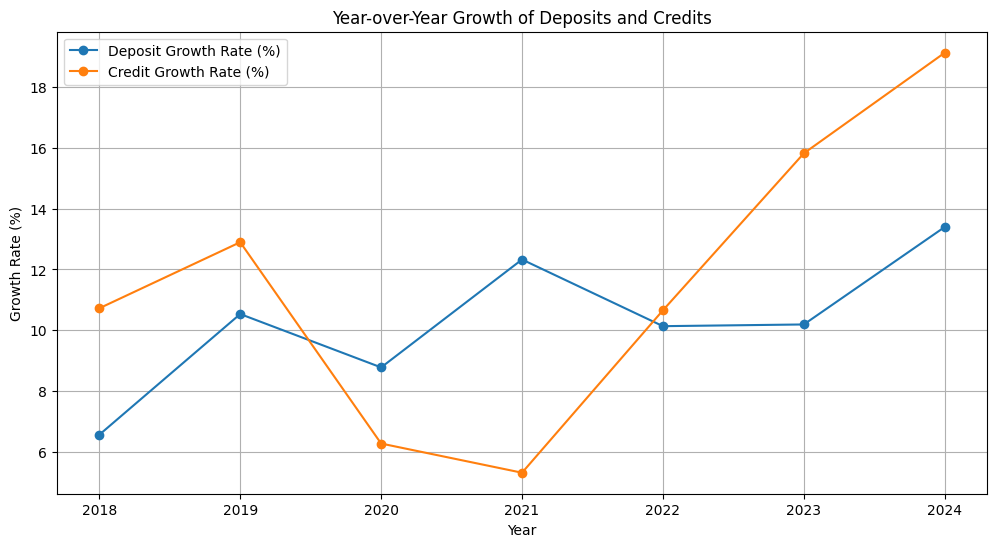

In [29]:
# Identify trends and patterns over the years.

# Group data by year and calculate the sum of deposits and credits for each year
yearly_data = df.groupby('srcYear').agg({
    'Deposit of SCBs excluding inter bank deposits as at end march': 'sum',
    'Bank credit of SCBs as at end march': 'sum'
})

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data['Deposit of SCBs excluding inter bank deposits as at end march'], label='Deposits', marker='o')
plt.plot(yearly_data.index, yearly_data['Bank credit of SCBs as at end march'], label='Credits', marker='o')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Trend of Deposits and Credits Over the Years')
plt.legend()
plt.grid(True)
plt.xticks(yearly_data.index)
plt.show()


# Calculate the year-over-year percentage change in deposits and credits
yearly_data['Deposit Growth'] = yearly_data['Deposit of SCBs excluding inter bank deposits as at end march'].pct_change() * 100
yearly_data['Credit Growth'] = yearly_data['Bank credit of SCBs as at end march'].pct_change() * 100

# Plot the year-over-year growth rates
plt.figure(figsize=(12,6))
plt.plot(yearly_data.index[1:], yearly_data['Deposit Growth'][1:], label='Deposit Growth Rate (%)', marker='o')
plt.plot(yearly_data.index[1:], yearly_data['Credit Growth'][1:], label='Credit Growth Rate (%)', marker='o')

plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Year-over-Year Growth of Deposits and Credits')
plt.legend()
plt.grid(True)
plt.xticks(yearly_data.index[1:]) # Start from the second year since the first year doesn't have growth
plt.show()


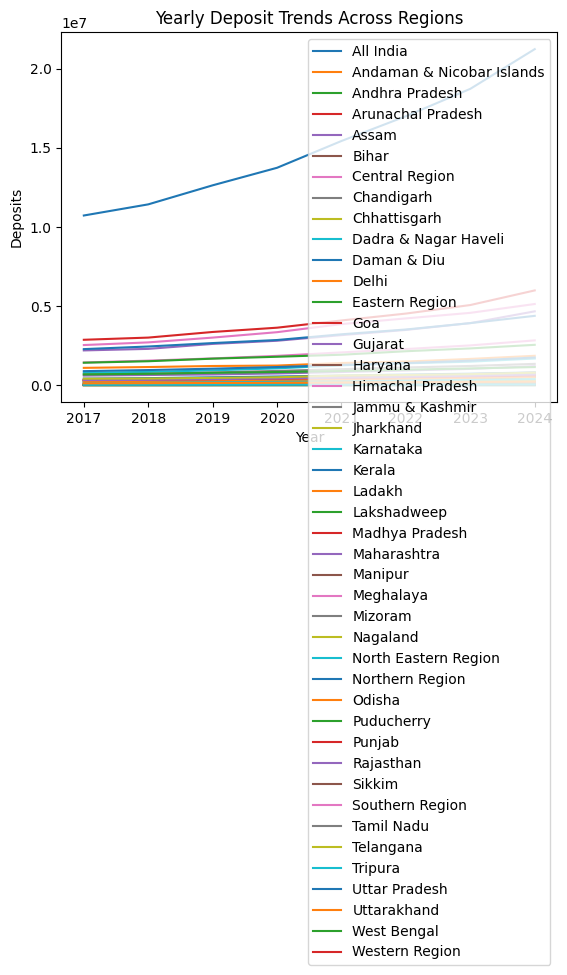

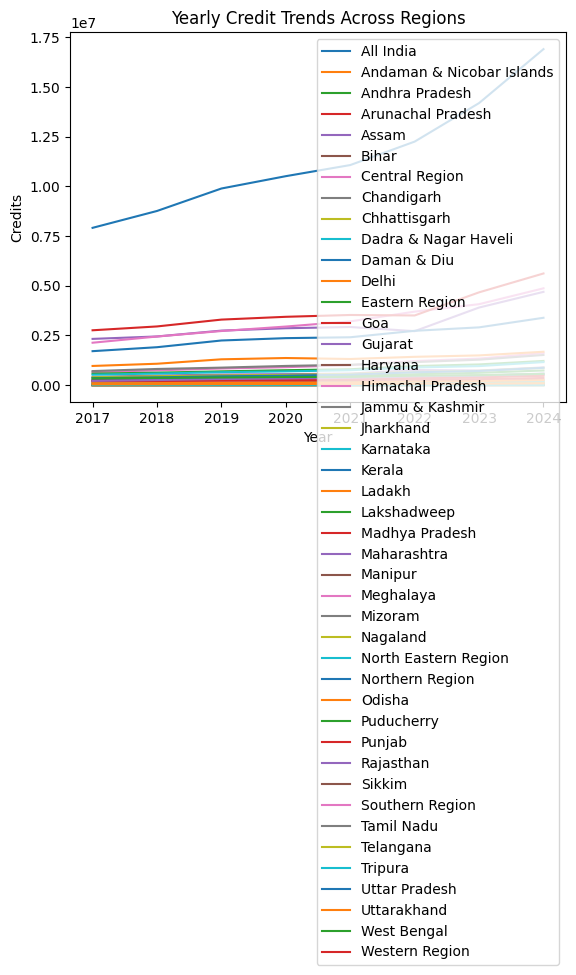

In [30]:

# Group data by year and region, then calculate the sum of deposits and credits.
yearly_regional_data = df.groupby(['srcYear', 'Region or state or Union Territory (UT)']).agg({
    'Deposit of SCBs excluding inter bank deposits as at end march': 'sum',
    'Bank credit of SCBs as at end march': 'sum'
}).reset_index()

# Plotting the trends for different regions
regions = yearly_regional_data['Region or state or Union Territory (UT)'].unique()
for region in regions:
    region_data = yearly_regional_data[yearly_regional_data['Region or state or Union Territory (UT)'] == region]
    plt.plot(region_data['srcYear'], region_data['Deposit of SCBs excluding inter bank deposits as at end march'], label=region)
plt.xlabel('Year')
plt.ylabel('Deposits')
plt.title('Yearly Deposit Trends Across Regions')
plt.legend()
plt.show()

for region in regions:
    region_data = yearly_regional_data[yearly_regional_data['Region or state or Union Territory (UT)'] == region]
    plt.plot(region_data['srcYear'], region_data['Bank credit of SCBs as at end march'], label=region)
plt.xlabel('Year')
plt.ylabel('Credits')
plt.title('Yearly Credit Trends Across Regions')
plt.legend()
plt.show()
